# Linear regression: fitting and interpreting


We call the fitting of the straight line function through our data, such that we obtain $a$ and $b$ in the way we mentioned above, a **linear regression**.  In fact, we will occasionally use it as a verb and talk of *regressing* $Y$ on $X$.

The origin of the "linear" part of the name is perhaps obvious, but the "regression" part may be more mysterious.  Ultimately, it comes from Galton's work on heights that we mentioned above: he called the best fitting linear function the "regression" line, and the name has stuck.  You will also sometimes hear data scientists talking of fitting a "linear model" to the data, and this typically means the same thing.  

To return to our state public health example, let's redraw our scatterplot, this time using the state's abbreviations for each observation:

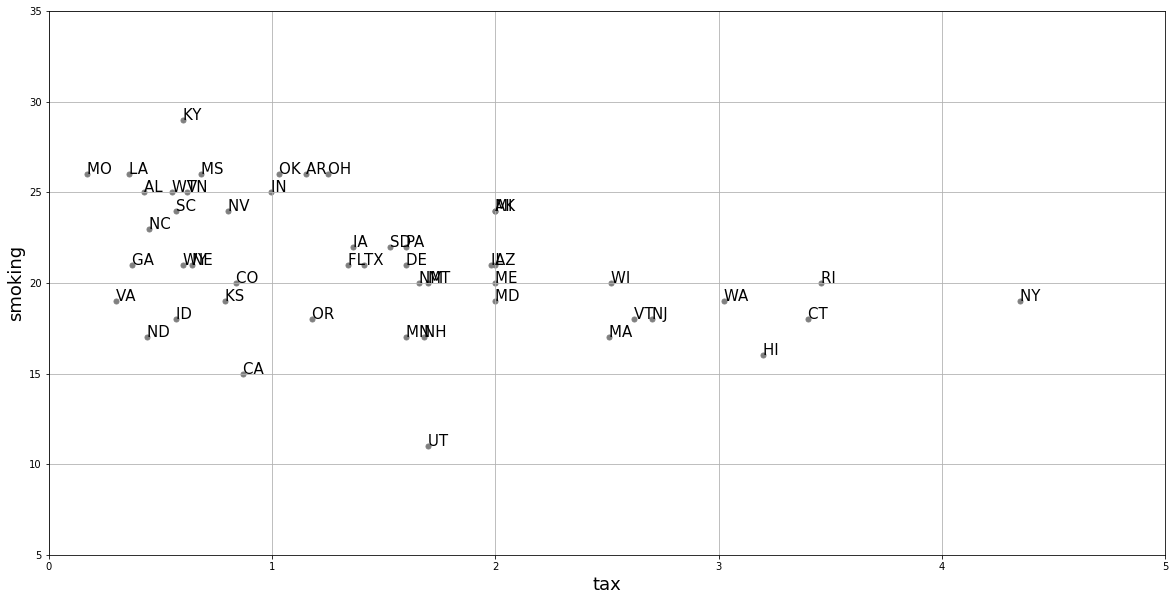

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
states_data = pd.read_csv("data/states_data.csv")


plt.figure(figsize=(20,10))

types = states_data["stateid"]
tax = states_data["cig_tax12"]
cigs = states_data["smokers12"]

for i,typep in enumerate(types):
    x = tax[i]
    y = cigs[i]
    plt.scatter(x, y, marker='.', color='gray', s=100)
    plt.text(x, y, typep, fontsize=15)

plt.grid()
plt.xlabel("tax", fontsize=18)
plt.ylabel("smoking", fontsize=18)
plt.xlim(0, 5)
plt.ylim(5, 35)
plt.show()

We will return to how this is calculated momentarily, but let us also add  the "best fitting" line to this figure. 

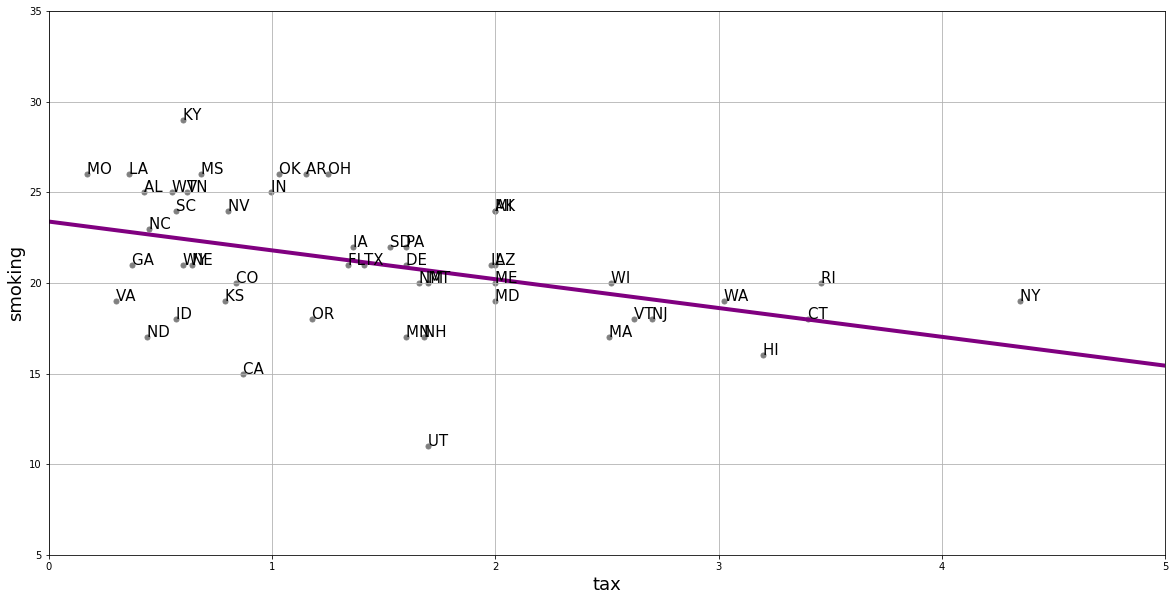

In [2]:
xx = ([0,5])
yy = ([23.39, (23.39+(-1.59*5))])


plt.figure(figsize=(20,10))

types = states_data["stateid"]
tax = states_data["cig_tax12"]
cigs = states_data["smokers12"]

for i,typep in enumerate(types):
    x = tax[i]
    y = cigs[i]
    plt.scatter(x, y, marker='.', color='gray', s=100)
    plt.text(x, y, typep, fontsize=15)

plt.grid()
plt.xlabel("tax", fontsize=18)
plt.ylabel("smoking", fontsize=18)
plt.xlim(0, 5)
plt.ylim(5, 35)

plt.plot(xx,yy, color="purple", linewidth=4)

plt.show()

Where the line crosses the $y$ axis is the intercept, $a$.  And the slope of the line, which is constant throughout its length, is the value of $b$.  The *equation* for this line is $Y=a+bX$.

If you have $a$ and $b$, you can draw the line just by plugging in the various values of $X$ to get a value for $Y$; if you can draw the line (that is, you the relevant $Y$ value for every $X$ value), you have $a$ and $b$.  

## Fitting the line
There are a large number of different, but equivalent, ways to fit the linear regression line to the data.  This is especially true in the case where one has a single independent variable as we do here.  It is not important in this course to understand the technical details of exactly how these methods work, or why they are equivalent.  It will suffice to note that we can use a combination of things we already know and have to obtain the estimates.  Those things are
- the function for standardizing observations
- the function for producing correlations
- a function that uses the means and standard deviations of the variables to produce a *slope* estimate
- a function that uses the slope estimate and other objects to produce the *intercept* estimate.
We now turn to these in order.

In particular, note that we can obtain the *slope* $b$ via the following calculation: 

$$
b = r_{XY} \times \frac{s_Y}{s_X}
$$
and then obtain the intercept $a$ via

$$
a = \bar{Y} - (b\times \bar{X})
$$

where: 
- $r_{XY}$ is the correlation of $X$ and $Y$
- $s_Y$ and $s_X$ are the standard deviations of $Y$ and $X$, respectively
- $\bar{Y}$ and $\bar{X}$ are the means of $X$ and $Y$, respectively

In [3]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))

Now let's use *them* to do calculate the *slope* and the *intercept*.

In [4]:
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t[label_y])/np.std(t[label_x])

def intercept(t, label_x, label_y):
    return np.mean(t[label_y])-slope(t, label_x, label_y)*np.mean(t[label_x])


All we need to do now is call these functions on our data and print the answers:

In [5]:
model_slope = slope(states_data, 'cig_tax12', 'smokers12')
model_intercept = intercept(states_data, 'cig_tax12', 'smokers12')

print("intercept...")
print(model_intercept) 
print("\n")
print("model slope...")
print(model_slope)

intercept...
23.388876340779785


model slope...
-1.5908929289147922


## Interpreting the results
The **estimated intercept** here is $23.38$.  This is, by definition, the point where the linear function crosses the $Y$-axis.  It is telling us that when $X$---the tax---is *zero*, $Y$---the percentage of smokers---will be $23.38$.

The **estimated slope** here is $-1.59$.  On average, $Y$ changes by slope (Y’s units) for a 1 (X’s) unit increase in $X$.

This means that the percentage of smokers changes by *minus 1.59* percentage points for every one dollar increase in tax per packet

Another way to put this is that, on average, increasing cigarette tax by one dollar decreases the percentage of smokers in the state by 1.59 percentage points.

We say "on average" to make the point that the relationship is not deterministic. That is, our maintained belief is not that *every* unit (every state) with the same $X$ value will have the *same* $Y$ value; and by extension, we do not believe that changing a unit's $X$ value will have the *same* effect on that unit's $Y$ value in every case.  Rather, our claims are about our *expectations* of what will happen: some individual units may be above or below our claimed effects.  So we state the effects "on average".

## Code aside: other packages
We won't belabor the point here, but notice that there are *many* ways to fit linear regressions in Python.  Just to demonstrate this fact, we will use a popular package called `statsmodels`, which outputs a nicely formatted *regression table*:

In [3]:
import statsmodels.formula.api as smf 

results = smf.ols('smokers12 ~ cig_tax12', data=states_data).fit()   
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              smokers12   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     10.98
Date:                Sat, 22 Oct 2022   Prob (F-statistic):            0.00176
Time:                        15:24:23   Log-Likelihood:                -128.61
No. Observations:                  50   AIC:                             261.2
Df Residuals:                      48   BIC:                             265.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3889      0.838     27.895      0.000      21.703      25.075
cig_tax12     -1.5909      0.480     -3.314      0.002      -2.556      -0.626
==============================================================================
Omnibus:                        4.584   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                3.484
Skew:                          -0.592   Prob(JB):                        0.175
Kurtosis:                       3.520   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, you can read off the estimate  (`coef`, meaning "coefficient") for the `Intercept` and the slope (the coefficient on `cig_tax12`) and see they are $23.38$ and $-1.59$, exactly as expected.

## Notes on regression

A few observations follow at this point. Notice that:

1. unlike correlation, **regression is not symmetric**. That is, the regression of $Y$ on $X$ is different to the regression of $X$ on $Y$. That difference is in terms of both set up and interpretation.

2. like correlation, **regression need not be causal**.  It is not difficult to think of confounders for the tax/smoking relationship above but, more generally, we cannot claim that the slope is the *causal* effect of $X$ and $Y$ without many more assumptions.

3. unlike correlation, **units matter**.  We are interpreting the slope as the effect on $Y$ of a *one unit* change in $X$. So clearly, the way $X$ is measured (i.e. its units) will matter for our interpretation.